In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

# Function to read raw text file
def read_text(filename):
    with open(filename, mode='rt', encoding='utf-8') as file:
        return file.read()

# Split a text into sentence pairs
def to_sentence_pairs(text):
    lines = text.strip().split('\n')
    sentence_pairs = [line.split('\t') for line in lines]
    return np.array(sentence_pairs)[:50000]  # Limit to first 50,000 pairs for efficiency

# Remove punctuation and convert to lowercase
def preprocess_text(sentence_pairs):
    removal_trans = str.maketrans('', '', string.punctuation)
    for i in range(len(sentence_pairs)):
        sentence_pairs[i, 0] = sentence_pairs[i, 0].translate(removal_trans).lower()
        sentence_pairs[i, 1] = sentence_pairs[i, 1].translate(removal_trans).lower()
    return sentence_pairs

# Calculate and plot sentence lengths
def plot_sentence_lengths(sentence_pairs):
    eng_lengths = [len(sentence.split()) for sentence in sentence_pairs[:, 0]]
    other_lengths = [len(sentence.split()) for sentence in sentence_pairs[:, 1]]
    length_df = pd.DataFrame({'ENG': eng_lengths, 'TR': other_lengths})
    length_df.hist(bins=30)
    plt.show()

# Main execution
data = read_text('/home/azureuser/cloudfiles/code/Users/DANIEL.OBRIEN.2022/TR2EN.txt')
sentence_pairs = to_sentence_pairs(data)
preprocessed_pairs = preprocess_text(sentence_pairs)
plot_sentence_lengths(preprocessed_pairs)


StatementMeta(a2f8f45e-5c3d-46ec-aeff-67f75d384aab, 10, 7, Finished, Available)

FileNotFoundError: [Errno 2] No such file or directory: '/home/azureuser/cloudfiles/code/Users/DANIEL.OBRIEN.2022/TR2EN.txt'

In [ ]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras_preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt

def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

eng_tokenizer = tokenization(sentence_pairs[:, 0])  # English sentences
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = 8

tr_tokenizer = tokenization(sentence_pairs[:, 1])  # Turkish sentences
tr_vocab_size = len(tr_tokenizer.word_index) + 1
tr_length = 8

# Example outputs
print('English Vocabulary Size:', eng_vocab_size)
print('Turkish Vocabulary Size:', tr_vocab_size)


StatementMeta(, , , Cancelled, )

In [ ]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(sentence_pairs, test_size=0.2, random_state = 12)

StatementMeta(, , , Cancelled, )

In [ ]:
# prepare training data
trainX = encode_sequences(tr_tokenizer, tr_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
testX = encode_sequences(tr_tokenizer, tr_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

StatementMeta(, , , Cancelled, )

In [7]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model
# model compilation
model = define_model(tr_vocab_size, eng_vocab_size, tr_length, eng_length, 512)
rms = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [8]:
filename = 'model.h1.24_jan_19'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=5, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/5
63/63 [==============================] - ETA: 0s - loss: 3.3481
Epoch 1: val_loss improved from inf to 2.70262, saving model to model.h1.24_jan_19
INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets
63/63 [==============================] - 102s 2s/step - loss: 3.3481 - val_loss: 2.7026
Epoch 2/5
63/63 [==============================] - ETA: 0s - loss: 2.6197
Epoch 2: val_loss improved from 2.70262 to 2.58958, saving model to model.h1.24_jan_19
INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets
63/63 [==============================] - 97s 2s/step - loss: 2.6197 - val_loss: 2.5896
Epoch 3/5
63/63 [==============================] - ETA: 0s - loss: 2.4534
Epoch 3: val_loss improved from 2.58958 to 2.45000, saving model to model.h1.24_jan_19
INFO:tensorflow:Assets 

INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets
INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets
INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets
INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets
INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


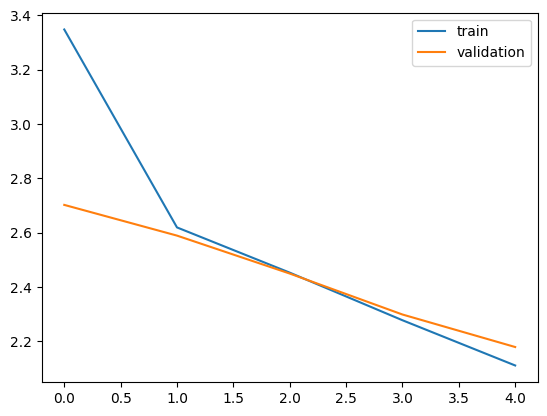

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [10]:
model = load_model('model.h1.24_jan_19')
preds = np.argmax(model.predict(testX), axis=1)

2024-04-04 10:03:58.264352: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2024-04-04 10:03:58.554289: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2024-04-04 10:03:59.460259: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2024-04-04 10:03:59.483575: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2024-04-04 10:03:59.784503: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _ou

313/313 [==============================] - 15s 45ms/step


In [11]:
import pandas as pd

def get_word(n, tokenizer):
    return tokenizer.index_word.get(n, '')

preds_text = []
for i in preds:
    temp = [get_word(token, eng_tokenizer) for token in i if token != 0]  # assuming 0 is used for padding
    preds_text.append(' '.join(temp).strip())

# Assuming `test` variable contains the actual translations for comparison
# Ensure `test` is appropriately defined; for example, it might be your test set's English sentences.
actual_texts = [' '.join([get_word(token, eng_tokenizer) for token in sent if token != 0]).strip() for sent in testX]

pred_df = pd.DataFrame({'actual': actual_texts, 'predicted': preds_text})

# Print 15 rows to inspect the results
print(pred_df.sample(15))

                  actual                                          predicted
3581          out online  im is tom i is tom i i is i i tom i i tom tom ...
9575                      im tom i tom i i i i tom tom tom tom i tom i i...
2034               you i  im tom tom tom tom tom tom i tom tom tom tom i...
7027    going took could  im i tom tom i tom i i i i i i tom tom tom tom...
8003      that will easy  im is is i is tom i tom i i i i i tom tom tom ...
9168      text wine look  im i tom tom tom tom tom tom tom tom tom tom t...
3269     accurate castle  im i tom tom i i tom tom tom tom tom tom tom i...
1376                 tom  im tom i tom i i i i tom tom tom tom tom i i i...
2310  my money i  happen  im is tom i you tom is i is is is i is tom tom...
3021    come help cheats  im tom tom tom tom i tom tom tom tom tom tom t...
4299     very owner lets  im tom i tom tom i i i tom i tom tom tom i tom...
4832    frightened tempt  im tom i i tom i i is i i i i tom tom tom tom ...
6906        